In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [44]:
titanic_df = pd.read_csv(r'E:\BSAI-5th\DataMining\DataSets\titanic.csv.xls')

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
titanic_df.shape

(891, 12)

In [49]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
clean_df = titanic_df.copy()

In [51]:
for pclass in [1, 2, 3]:
    median_age = clean_df[clean_df['Pclass'] == pclass]['Age'].median()
    clean_df.loc[(clean_df['Age'].isnull()) & (clean_df['Pclass'] == pclass), 'Age'] = median_age

In [52]:
most_common_port = clean_df['Embarked'].mode()[0]
clean_df['Embarked'].fillna(most_common_port, inplace=True)

In [53]:
clean_df['HasCabin'] = clean_df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
clean_df['Gender'] = clean_df['Gender'].str.lower()
print("Unique values in Gender column:", clean_df['Gender'].unique())

Unique values in Gender column: ['male' 'female']


In [54]:
Q1 = clean_df['Fare'].quantile(0.25)
Q3 = clean_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
fare_outliers = clean_df[(clean_df['Fare'] < (Q1 - 1.5 * IQR)) | (clean_df['Fare'] > (Q3 + 1.5 * IQR))]
print(f"Number of fare outliers: {len(fare_outliers)}")

Number of fare outliers: 116


In [55]:
print("Remaining missing values after cleaning:")
print(clean_df.isnull().sum())

Remaining missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64


In [56]:
binned_df = clean_df.copy()

In [57]:
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
binned_df['AgeBin'] = pd.cut(binned_df['Age'], bins=age_bins, labels=age_labels)

In [58]:
fare_bins = [0, 7.91, 14.45, 31.0, 600]  # Quartiles plus the max
fare_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
binned_df['FareBin'] = pd.cut(binned_df['Fare'], bins=fare_bins, labels=fare_labels)

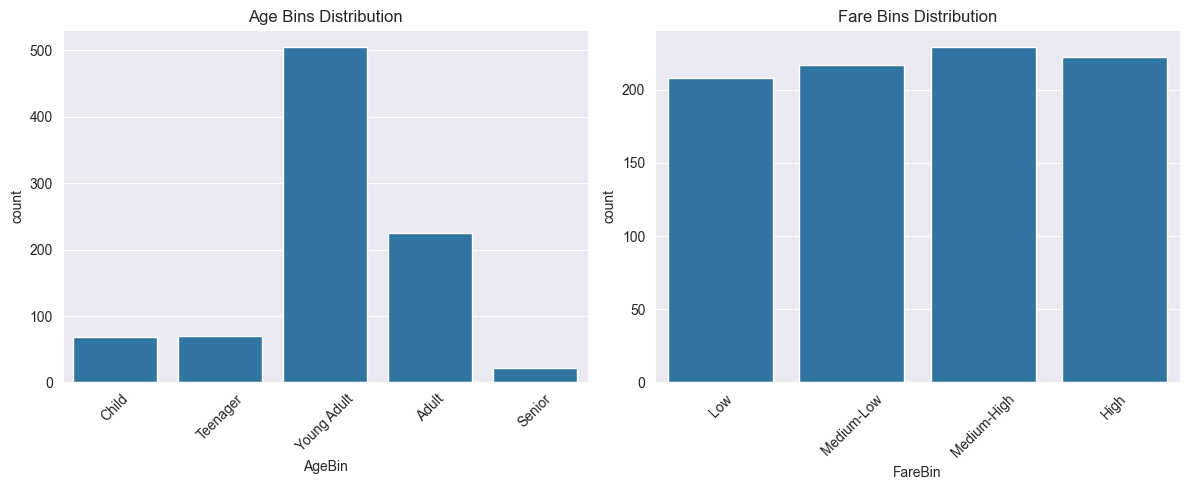

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='AgeBin', data=binned_df)
plt.title('Age Bins Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='FareBin', data=binned_df)
plt.title('Fare Bins Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [60]:
print("Age bins counts:")
print(binned_df['AgeBin'].value_counts())

Age bins counts:
AgeBin
Young Adult    505
Adult          225
Teenager        70
Child           69
Senior          22
Name: count, dtype: int64


In [61]:
print("Fare bins counts:")
print(binned_df['FareBin'].value_counts())

Fare bins counts:
FareBin
Medium-High    229
High           222
Medium-Low     217
Low            208
Name: count, dtype: int64


In [62]:
print("Survival rate by age bin:")
print(binned_df.groupby('AgeBin')['Survived'].mean())

Survival rate by age bin:
AgeBin
Child          0.579710
Teenager       0.428571
Young Adult    0.346535
Adult          0.408889
Senior         0.227273
Name: Survived, dtype: float64


In [63]:
print("Survival rate by fare bin:")
print(binned_df.groupby('FareBin')['Survived'].mean())

Survival rate by fare bin:
FareBin
Low            0.206731
Medium-Low     0.308756
Medium-High    0.445415
High           0.581081
Name: Survived, dtype: float64


In [64]:
final_df = binned_df.copy()

In [65]:
final_df['FamilySize'] = final_df['SibSp'] + final_df['Parch'] + 1  # +1 includes the passenger
final_df['IsAlone'] = (final_df['FamilySize'] == 1).astype(int)
final_df['Title'] = final_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [66]:
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer'
}
final_df['Title'] = final_df['Title'].map(lambda t: title_mapping.get(t, 'Other'))
print("Title distribution after grouping:")
print(final_df['Title'].value_counts())

Title distribution after grouping:
Title
Mr         517
Miss       182
Mrs        125
Master      40
Officer     18
Other        9
Name: count, dtype: int64


In [67]:
correlation_features = ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'HasCabin']
correlation_matrix = final_df[correlation_features].corr()

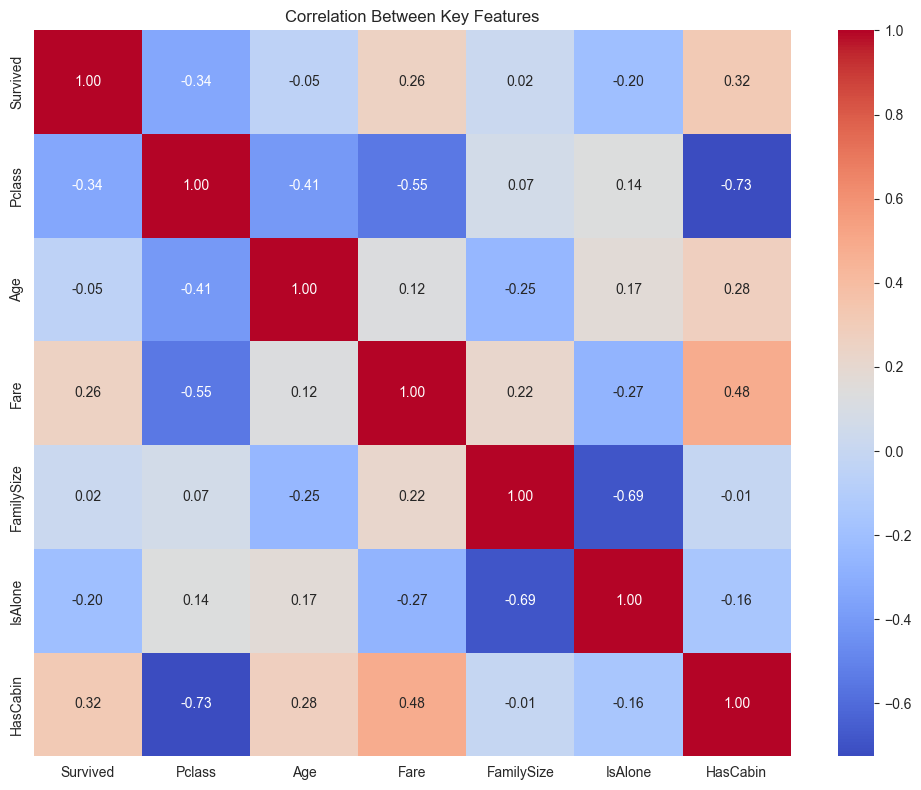

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Key Features')
plt.tight_layout()
plt.show()

In [69]:
print("Correlations with survival:")
print(correlation_matrix['Survived'].sort_values(ascending=False))

Correlations with survival:
Survived      1.000000
HasCabin      0.316912
Fare          0.257307
FamilySize    0.016639
Age          -0.047255
IsAlone      -0.203367
Pclass       -0.338481
Name: Survived, dtype: float64


In [70]:
final_columns = ['PassengerId', 'Survived', 'Pclass', 'Gender', 'Age', 'Fare',
                'Embarked', 'AgeBin', 'FareBin', 'HasCabin', 'FamilySize',
                'IsAlone', 'Title']
prepared_df = final_df[final_columns].copy()

In [71]:
prepared_df['Gender'] = prepared_df['Gender'].map({'male': 0, 'female': 1})

In [72]:
prepared_df.to_csv('titanic_preprocessed.csv', index=False)

In [73]:
prepared_df.head()

,PassengerId,Survived,Pclass,Gender,Age,Fare,Embarked,AgeBin,FareBin,HasCabin,FamilySize,IsAlone,Title
0,1,0,3,0,22.0,7.2500,S,Young Adult,Low,0,2,0,Mr
1,2,1,1,1,38.0,71.2833,C,Adult,High,1,2,0,Mrs
2,3,1,3,1,26.0,7.9250,S,Young Adult,Medium-Low,0,1,1,Miss
3,4,1,1,1,35.0,53.1000,S,Young Adult,High,1,2,0,Mrs
4,5,0,3,0,35.0,8.0500,S,Young Adult,Medium-Low,0,1,1,Mr


In [74]:
prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Gender       891 non-null    int64   
 4   Age          891 non-null    float64 
 5   Fare         891 non-null    float64 
 6   Embarked     891 non-null    object  
 7   AgeBin       891 non-null    category
 8   FareBin      876 non-null    category
 9   HasCabin     891 non-null    int64   
 10  FamilySize   891 non-null    int64   
 11  IsAlone      891 non-null    int32   
 12  Title        891 non-null    object  
dtypes: category(2), float64(2), int32(1), int64(6), object(2)
memory usage: 75.4+ KB


In [75]:
prepared_df.describe()

,PassengerId,Survived,Pclass,Gender,Age,Fare,HasCabin,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.066409,32.204208,0.228956,1.904602,0.602694
std,257.353842,0.486592,0.836071,0.477990,13.244532,49.693429,0.420397,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,26.000000,14.454200,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,31.000000,0.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200,1.000000,11.000000,1.000000


In [76]:
prepared_df.shape

(891, 13)